##### 1. Extend the companies’ data, collected in Mini Project 1 with quantitative attributes describing the financial status and the human resources, available in public sources, like proff.dk.
##### 2. Apply ML to discover any significant factors influencing the financial results of the companies and use them for modelling and predicting the profit of 2022.
##### 3. Categorize the companies as Small, Middle, or Large according the accepted European standards. Apply ML to build a model for predicting the location of a new small company in 2023.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.metrics as sm
import math 
import pprint
import pickle

from scipy.stats import normaltest
from sklearn import datasets, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Data Preparation

In [2]:
dfExcel = pd.read_excel('companies.xlsx')
dfExcel = dfExcel.dropna()
dfExcel

,company,cvr,2022,2021,2020,employees,address,place_name
0,NorthTech ApS,10121361,5.0,598.0,792.0,20,Wildersgade 51,København K
1,PFA,13594376,-79000.0,108000.0,10000.0,1464,Sundkrogsgade 4,København Ø
2,Netcompany A/S,14814833,583573.0,570944.0,450133.0,2340,Grønningen 17,København K
3,Elbek-vejrup,20117982,43935.0,54376.0,44403.0,171,Tangen 6,Aarhus N
4,ELLAB A/S,20896949,136500.0,98092.0,90317.0,166,"Trollesmindealle 25, Hillerød",Hillerød
5,Wilke A/S,21830445,3834.0,2006.0,1561.0,175,"Gråbrødrepassagen 9, Odense C",Odense C
6,Novo Nordisk,24256790,47523000.0,42159000.0,39252000.0,22150,"Novo Alle 1, Bagsværd",Bagsværd
7,KMD A/S,26911745,53926.0,2893.0,173758.0,1855,"Lautrupparken 40, Ballerup",Ballerup
8,Alpha Solutions,27506488,3477.0,4334.0,-2940.0,59,"Gothersgade 14, København K",København K
9,Formpipe,29177015,36583.0,14719.0,7525.0,87,"Lautrupvang 1, Ballerup",Ballerup


## Explore

In [3]:
dfExcel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 24
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company     23 non-null     object 
 1   cvr         23 non-null     int64  
 2   2022        23 non-null     float64
 3   2021        23 non-null     float64
 4   2020        23 non-null     float64
 5   employees   23 non-null     int64  
 6   address     23 non-null     object 
 7   place_name  23 non-null     object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.6+ KB


In [4]:
dfExcel.isnull().sum()

company       0
cvr           0
2022          0
2021          0
2020          0
employees     0
address       0
place_name    0
dtype: int64

In [5]:
dfExcel.describe

<bound method NDFrame.describe of                               company       cvr        2022        2021  \
0                       NorthTech ApS  10121361         5.0       598.0   
1                                 PFA  13594376    -79000.0    108000.0   
2                      Netcompany A/S  14814833    583573.0    570944.0   
3                        Elbek-vejrup  20117982     43935.0     54376.0   
4                           ELLAB A/S  20896949    136500.0     98092.0   
5                           Wilke A/S  21830445      3834.0      2006.0   
6                        Novo Nordisk  24256790  47523000.0  42159000.0   
7                             KMD A/S  26911745     53926.0      2893.0   
8                     Alpha Solutions  27506488      3477.0      4334.0   
9                            Formpipe  29177015     36583.0     14719.0   
10                 Groupm Denmark A/S  30240782      1195.0      2757.0   
11                     Wash World ApS  34486735     14822.0     13

In [6]:
def predict(company_name) :
    row = dfExcel[dfExcel['company'] == company_name].iloc[0]
    X = [[2020], [2021]]
    y = [row[2020], row[2021]]
    
    #fitter
    model = LinearRegression()
    model.fit(X, y)
    
    ##predicter
    prediction = model.predict([[2022]])
    
    plt.scatter(X, y)
    plt.plot(X, model.predict(X), color='red')
    plt.plot([[2022]], prediction, 'ro')
    plt.xlabel('Year')
    plt.ylabel('Income')
    plt.title('Linear Regression')
    plt.xticks(rotation=90)
    plt.show()

    return f'Expected income of 2022: {int(prediction)} DKK \nActual income of 2022: {int(row[2022])} DKK'

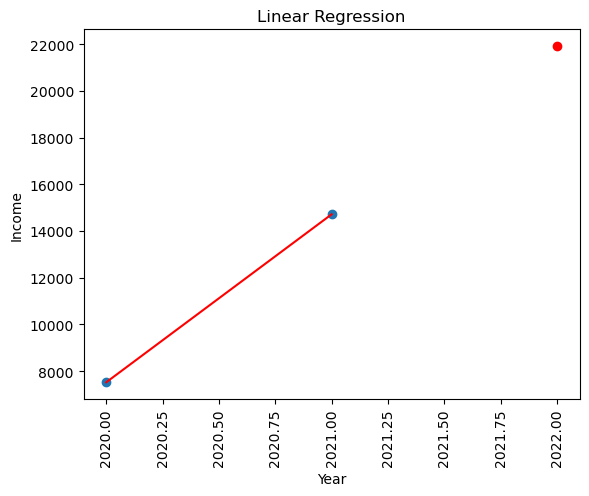

Expected income of 2022: 21913 DKK 
Actual income of 2022: 36583 DKK


In [7]:
print(predict('Formpipe'))

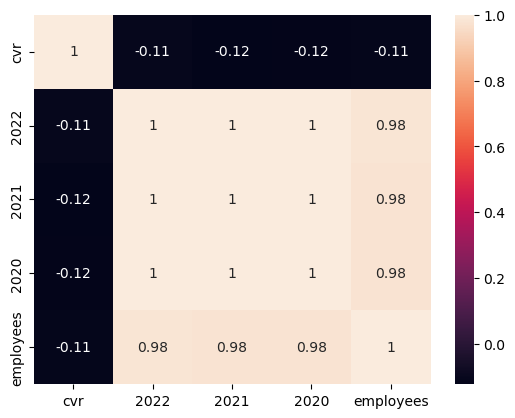

In [8]:
corr_matrix = dfExcel.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## In this section i decide what size the companies are from the SME definition. 

#### I excluded the turnover and the balance sheet total and just defined the size from the staff headcount

In [9]:
def categorize_company(row):
    num_employees = row["employees"]
    if num_employees < 50:
        return "Small"
    elif num_employees >= 50 and num_employees < 250 :
        return "Middle"
    elif num_employees >= 250:
        return "Large"
    else:
        return "Uncategorized"

dfExcel["company_size"] = dfExcel.apply(categorize_company, axis=1)

In [10]:
dfExcel.head()

,company,cvr,2022,2021,2020,employees,address,place_name,company_size
0,NorthTech ApS,10121361,5.0,598.0,792.0,20,Wildersgade 51,København K,Small
1,PFA,13594376,-79000.0,108000.0,10000.0,1464,Sundkrogsgade 4,København Ø,Large
2,Netcompany A/S,14814833,583573.0,570944.0,450133.0,2340,Grønningen 17,København K,Large
3,Elbek-vejrup,20117982,43935.0,54376.0,44403.0,171,Tangen 6,Aarhus N,Middle
4,ELLAB A/S,20896949,136500.0,98092.0,90317.0,166,"Trollesmindealle 25, Hillerød",Hillerød,Middle


## To be able to use machine learning, i know transform the sizes: Large, Middle and Small into numerical so that we are able to use it with out machinelearning model.

### Large = 0
### Middle = 1
### Small = 2

In [11]:
size_to_number = {'Large': 0, 'Middle': 1, 'Small': 2}

dfExcel['company_size'] = dfExcel['company_size'].replace(size_to_number)

dfExcel

,company,cvr,2022,2021,2020,employees,address,place_name,company_size
0,NorthTech ApS,10121361,5.0,598.0,792.0,20,Wildersgade 51,København K,2
1,PFA,13594376,-79000.0,108000.0,10000.0,1464,Sundkrogsgade 4,København Ø,0
2,Netcompany A/S,14814833,583573.0,570944.0,450133.0,2340,Grønningen 17,København K,0
3,Elbek-vejrup,20117982,43935.0,54376.0,44403.0,171,Tangen 6,Aarhus N,1
4,ELLAB A/S,20896949,136500.0,98092.0,90317.0,166,"Trollesmindealle 25, Hillerød",Hillerød,1
5,Wilke A/S,21830445,3834.0,2006.0,1561.0,175,"Gråbrødrepassagen 9, Odense C",Odense C,1
6,Novo Nordisk,24256790,47523000.0,42159000.0,39252000.0,22150,"Novo Alle 1, Bagsværd",Bagsværd,0
7,KMD A/S,26911745,53926.0,2893.0,173758.0,1855,"Lautrupparken 40, Ballerup",Ballerup,0
8,Alpha Solutions,27506488,3477.0,4334.0,-2940.0,59,"Gothersgade 14, København K",København K,1
9,Formpipe,29177015,36583.0,14719.0,7525.0,87,"Lautrupvang 1, Ballerup",Ballerup,1


### Now i want to get a DF with only small companies which were assigned to "2"

In [12]:
dfExcel = dfExcel[dfExcel['company_size'] == 2]

In [13]:
dfExcel.head()

,company,cvr,2022,2021,2020,employees,address,place_name,company_size
0,NorthTech ApS,10121361,5.0,598.0,792.0,20,Wildersgade 51,København K,2
12,Carve Consulting P/S,35211942,3821.0,5652.0,1273.0,46,"Købmagergade 11, København K",København K,2
13,Precure,38174010,-805.0,-373.0,-976.0,15,"Bryggeristræde 2, Allinge",Allinge,2
14,Meew,38455958,451.0,-81.0,-360.0,43,"Wildersgade 9, København K",København K,2
15,Ooono,38863398,7001.0,1451.0,-5790.0,40,"Gearhalsvej 1, Valby",Valby,2


## Logistic regression

In [16]:
company_data = dfExcel[['company_size', 'place_name']]

# Splitter data til træning og testing
train_data, test_data = train_test_split(company_data, random_state=43, test_size=0.2)

# Training a logistic regression model on the training data
model = LogisticRegression()
model.fit(train_data[['company_size']], train_data['place_name'])

# Testing the model on the testing data
accuracy = model.score(test_data[['company_size']], test_data['place_name'])
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Use the model to predict the location of a new company small company which in my case were '2' as mentioned above
new_company_size = 2
predicted_location = model.predict([[new_company_size]])
print("Predicted location: ", predicted_location[0])

Accuracy: 50.00%
Predicted location:  København K


/Users/markusagnsgaard/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Random forest Classifier

In [19]:
# vælger her  de features og target variable som jeg vil tage udgangspunkt i
X = dfExcel[['company_size']]
y = dfExcel['place_name']

# splitter dataen til  træning og test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# create a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=43)

# fitter modellen til trænings dataen
model.fit(X_train, y_train)

# laver predictions på test dataen
y_pred = model.predict(X_test)

# udregner den reelle accuracy af modellen
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# laver en prediction for et nyt company size med størrelsen "2" = Small
new_company_size = 2
new_data = pd.DataFrame({'company_size': [new_company_size]})
predicted_location = model.predict(new_data)
print("Predicted location: ", predicted_location[0])


Accuracy: 50.00%
Predicted location:  København K
